# Introducción a Sympy

La idea de este documento es brindar al alumno una breve guía orientativa para la utilización de la librería Sympy como herramienta para la resolución del Trabajo de Laboratorio Computacional n° 2.

El eje central de Sympy es el manejo de expresiones simbólicas. Para definir una expresión simbólica, primeramente debemos definir los *símbolos* que vamos a utilizar y que van a ser los elementos con los que podamos construir nuestras funciones. Comenzamos importando la librería

In [2]:
import sympy as sp

Ahora definimos nuestra variable simbólica $t$. Por defecto, las variables simbólicas son complejas. Por tanto si deseamos definir una variable real, debemos aclararlo

In [4]:
t = sp.symbols('t',real = True)

Hecho esto, estamos en condiciones de definir funciones simbólicas. Por ejemplo $\displaystyle f(t) =\frac{8(1+t/2)}{(4-4t)(2+t)}$

In [80]:
f_t = 8*(1+t/2)/((4-4*t)*(2+t))
f_t

(4*t + 8)/((4 - 4*t)*(t + 2))

Ahora podemos operar y manipular nuestra función $f(t)$ como deseemos. Por ejemplo, pidiéndole a Sympy que la simplifique

In [81]:
f_t = f_t.simplify()
f_t

-1/(t - 1)

De manera similar podemos pedirle a Sympy que integre nuestra función, que encuentre su derivada, que encuentre las raíces de su denominador, etc. Para el caso de querer obtener su derivada podemos hacerlo como

In [82]:
f_t.diff()

(t - 1)**(-2)

Una función importante dentro de la librería es la función **Sum()** la cual nos permite definir una sumatoria. Esto podemos hacerlo de la siguiente manera

In [83]:
# Definimos el índice de la sumatoria como variable simbólica
n = sp.symbols("n",real = True)

In [84]:
# Definimos nuestra sumatoria simbólica mediante la función Sum()
Fn_t = sp.Sum(t**n/sp.factorial(n),(n,0,sp.oo))
Fn_t

Sum(t**n/factorial(n), (n, 0, oo))

En situaciones donde no querramos definir una sumatoria infinita simplemente podemos cambiar el límite superior de la expresión. Por ejemplo si quisiéramos quedarnos con los primeros 4 términos de la sumatoria podemos hacerlo de la siguiente manera

In [85]:
N = 3
Fn_t = sp.Sum(t**n/sp.factorial(n),(n,0,N))
Fn_t

Sum(t**n/factorial(n), (n, 0, 3))

Por defecto simpy nos devuelve la sumatoria en su forma compacta y en general para realizar operaciones que involucren sumatorias es una buena práctica expresarla en su forma expandida. Esto podemos hacerlo mediante el método **doit()**

In [86]:
Fn_t = Fn_t.doit()
Fn_t

t**3/6 + t**2/2 + t + 1

Finalmente, utilizando la función **plot()** podemos representar nuestras expresiones simbólicas

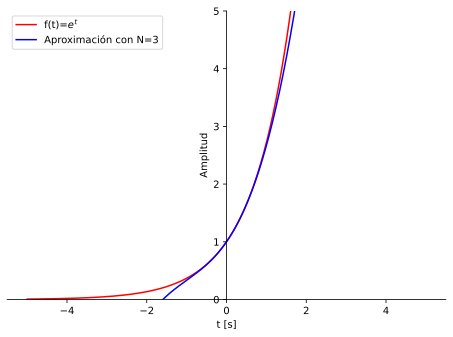

In [88]:
# Antes de realizar el plot cambiamos el formato de la imagen de salida para obtener una imagen de alta calidad
%config InlineBackend.figure_format = 'svg'

plot = sp.plot(sp.exp(t),(t,-5,5),ylim=(0,5),xlabel = 't [s]', ylabel='Amplitud',label='f(t)=$e^t$',line_color='red',legend=True,show=False);
plot.extend(sp.plot(Fn_t,(t,-5,5),ylim=(0,2), line_color='blue',label='Aproximación con N=3', show=False))
plot.show()